#  Market Segmentation Analysis on Electric Vedhicle in India





### importing all the necessary libraries

In [1]:
%pip install plotly==5.8.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb
import statsmodels.api as sm
from tqdm import tqdm
%pip install kaleido
import kaleido
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram , linkage
from sklearn.cluster import KMeans , MeanShift , estimate_bandwidth
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from collections import Counter
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
pd.set_option("display.precision",3)
np.set_printoptions(precision=5, suppress=True)
pd.options.display.float_format = '{:.4f}'.format
import plotly.io as pio
pio.renderers.default = "svg"







Note: you may need to restart the kernel to use updated packages.


### Reading csv file using pandas


In [3]:
df= pd.read_csv('elctrivvehicle.xls')
df['inr(10e3)'] = df['PriceEuro']*0.08320
df['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,inr(10e3)
0,Tesla,Model 3 Long Range Dual Motor,4.6000,233,450,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480,4615.9360
1,Volkswagen,ID.3 Pure,10.0000,160,270,167,250,1,RWD,Type 2 CCS,Hatchback,C,5,30000,2496.0000
2,Polestar,2,4.7000,210,400,181,620,1,AWD,Type 2 CCS,Liftback,D,5,56440,4695.8080
3,BMW,iX3,6.8000,180,360,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040,5660.9280
4,Honda,e,9.5000,145,170,168,190,1,RWD,Type 2 CCS,Hatchback,B,4,32997,2745.3504


### Display first five rows

In [4]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,inr(10e3)
0,Tesla,Model 3 Long Range Dual Motor,4.6000,233,450,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480,4615.9360
1,Volkswagen,ID.3 Pure,10.0000,160,270,167,250,1,RWD,Type 2 CCS,Hatchback,C,5,30000,2496.0000
2,Polestar,2,4.7000,210,400,181,620,1,AWD,Type 2 CCS,Liftback,D,5,56440,4695.8080
3,BMW,iX3,6.8000,180,360,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040,5660.9280
4,Honda,e,9.5000,145,170,168,190,1,RWD,Type 2 CCS,Hatchback,B,4,32997,2745.3504


### Finding if there is any null value present in the dataset

In [5]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
inr(10e3)          0
dtype: int64

There is no null value present 

# Descriptive statsistics of the data

In [6]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,RapidCharge,Seats,PriceEuro,inr(10e3)
count,103.0000,103.0000,103.0000,103.0000,103.0000,103.0000,103.0000,103.0000
mean,7.3961,179.1942,338.7864,189.1650,0.9515,4.8835,55811.5631,4643.5221
std,3.0174,43.5730,126.0144,29.5668,0.2160,0.7958,34134.6653,2840.0042
min,2.1000,123.0000,95.0000,104.0000,0.0000,2.0000,20129.0000,1674.7328
25%,5.1000,150.0000,250.0000,168.0000,1.0000,5.0000,34429.5000,2864.5344
50%,7.3000,160.0000,340.0000,180.0000,1.0000,5.0000,45000.0000,3744.0000
75%,9.0000,200.0000,400.0000,203.0000,1.0000,5.0000,65000.0000,5408.0000
max,22.4000,410.0000,970.0000,273.0000,1.0000,7.0000,215000.0000,17888.0000


# information of each data in the given dataset is given by

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    int64  
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
 14  inr(10e3)        103 non-null    float64
dtypes: float64(2), int64(6), object(7)
memory usage: 12.2+ KB


# Pairplot of all the columns based on Rapid Charger presence

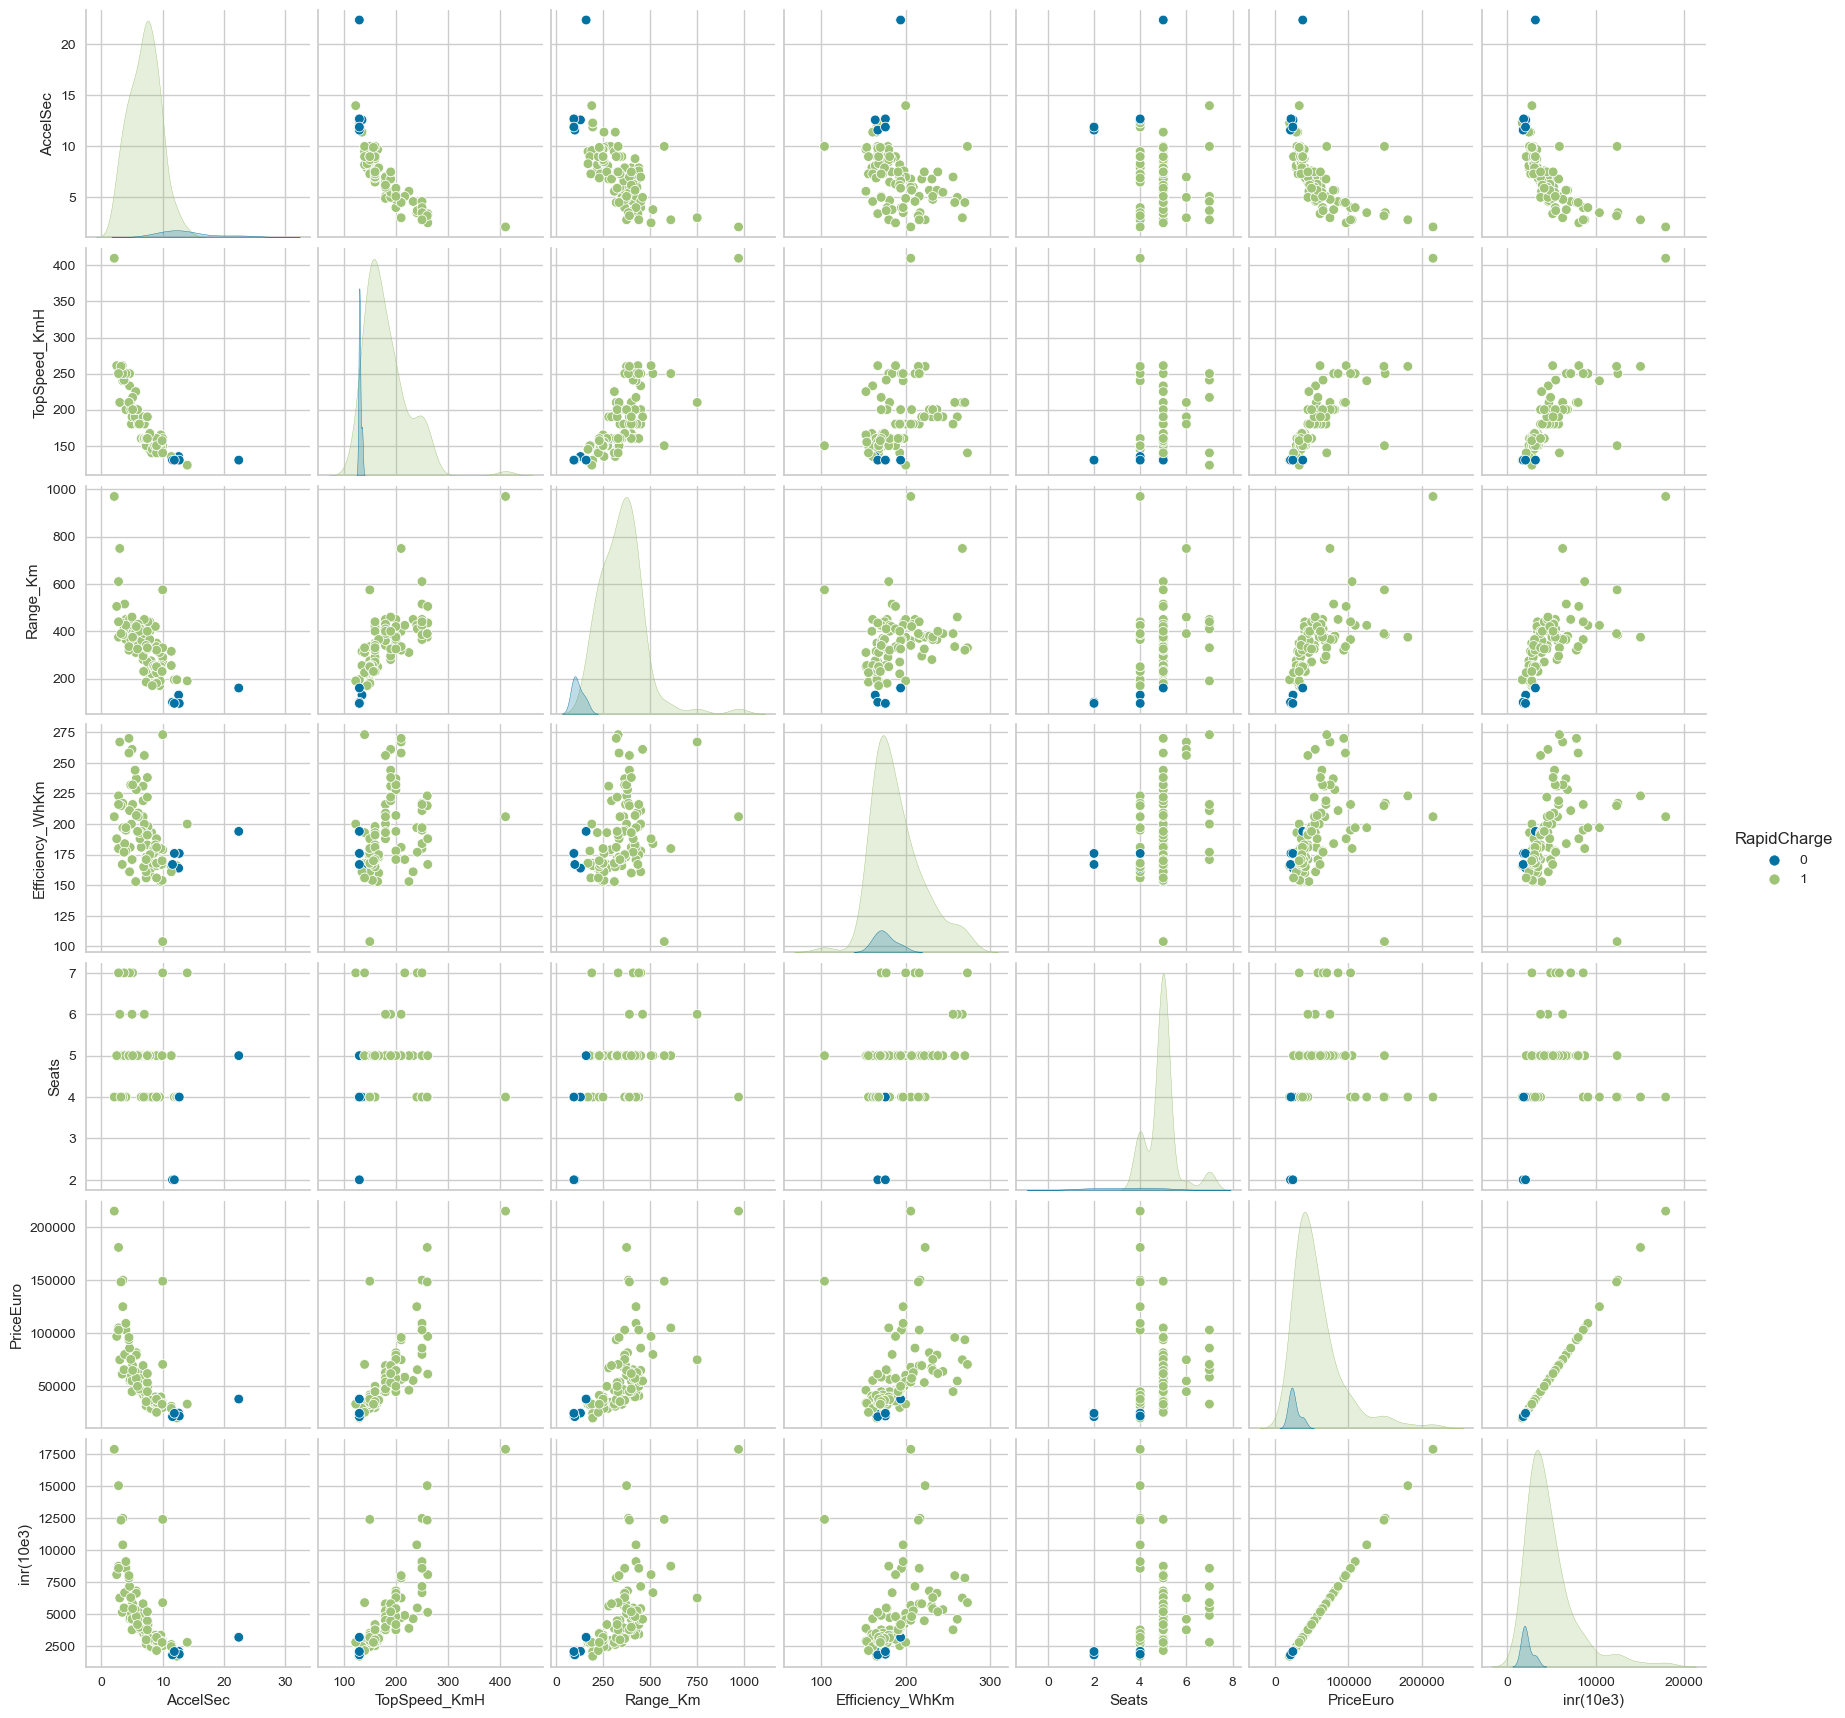

In [8]:
sb.pairplot(df,hue='RapidCharge')

# Heatmap to show correlation of data

In [9]:
ax= plt.figure(figsize=(15,8))
sb.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)

<AxesSubplot:>

There are total two column that are highly corelated first one is price and Topspeed 0.83 positively corelated and this is obvious thing if price is increase so we get more features and secone one corelated feature is topspeed and range is 0.75 positively corelated

# Frequency of the brand in the dataset

In [10]:
a=np.arange(1,104)
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y=a,data=df)
plt.grid(axis='y')
plt.title('Brands in the dataset')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

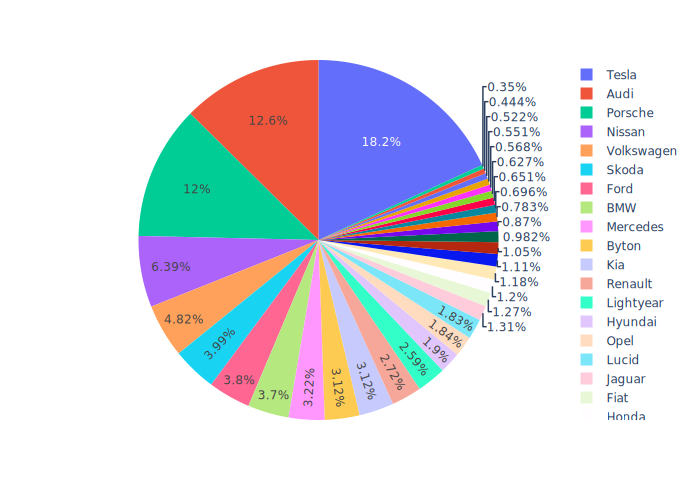

In [11]:
fig = px.pie(df,names = 'Brand',values = 'inr(10e3)')
pio.show(fig)

Byton , Fiat and smart are the prominent brands and Polestar being the least

# Top speed of the car by brands

In [12]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='TopSpeed_KmH',data=df,palette='Paired')
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

Porsche, Lucid and Tesla produce the fastest cars and Smart the lowest

# Range a car can achieve

In [13]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='Range_Km',data=df,palette='tab10')
plt.grid(axis='y')
plt.title('Maximum Range achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Range')
plt.xticks(rotation=45)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

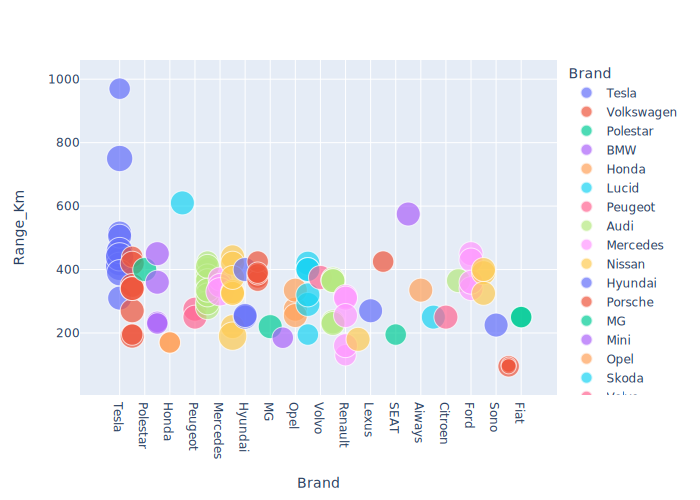

In [14]:
fig = px.scatter(df,x = 'Brand',y = 'Range_Km',size='Seats',color = 'Brand',hover_data=['RapidCharge','inr(10e3)'])
pio.show(fig)

Lucid, Lightyear and Tesla have the highest range and Smart the lowest

# car efficiency

In [15]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='Efficiency_WhKm',data=df,palette='hls')
plt.grid(axis='y')
plt.title('Efficiency achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

Byton , Jaguar and Audi are the most efficient and Lightyear the leas

# number of seats in car


In [16]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='Seats',data=df,palette='husl')
plt.grid(axis='y')
plt.title('Seats in a car')
plt.xlabel('Brand')
plt.ylabel('Seats')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

Mercedes, Tesla and Nissan have the highest number of seats and Smart the lowest

# price of cars (in Euro)

In [17]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='Brand',y='inr(10e3)',data=df,palette='Set2')
plt.title('Price of a Car')
plt.xlabel('Price in Euro')
plt.grid(axis='y')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

In [18]:
df['inr(10e3)'].plot(figsize = (12,8),title='Car Price',xlabel ='No. of Samples',ylabel = 'Car Price',color = 'green')

<AxesSubplot:title={'center':'Car Price'}, xlabel='No. of Samples', ylabel='Car Price'>

Lightyear, Porsche and Lucid are the most expensive and SEAT and Smart the least

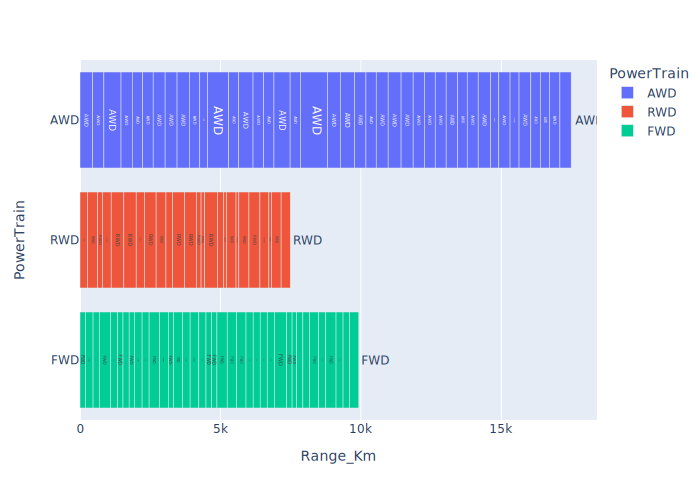

In [19]:
fig = px.bar(df,x = 'Range_Km',y = 'PowerTrain',color = 'PowerTrain',text='PowerTrain')
pio.show(fig)

### 3D Visualization 

Relation between Brand Seats and Segment

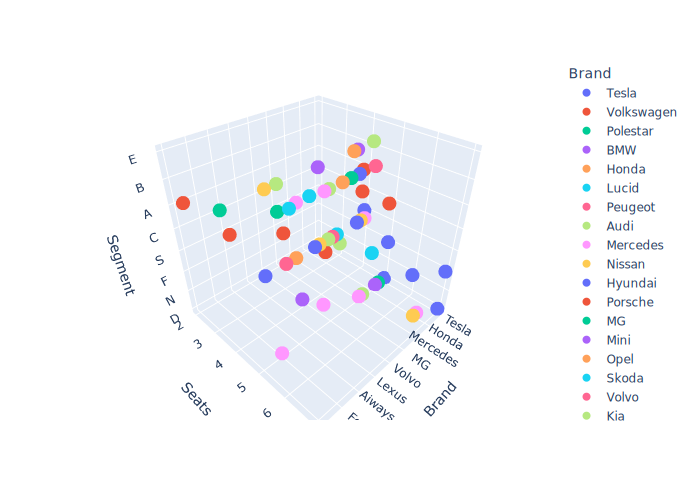

In [20]:
fig = px.scatter_3d(df,x = 'Brand',y = 'Seats',z = 'Segment',color='Brand')
pio.show(fig)

Relation Between Brand Accelsec and price 

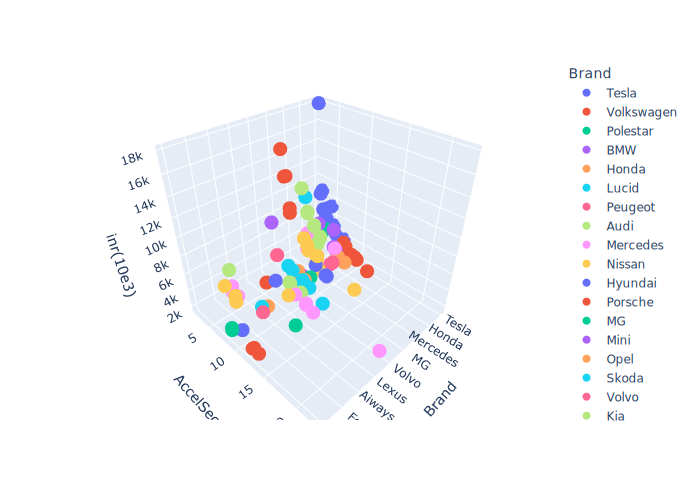

In [21]:
fig = px.scatter_3d(df,x = 'Brand',y = 'AccelSec',z = 'inr(10e3)',color = 'Brand')
pio.show(fig)

Box plot for finding outliers 

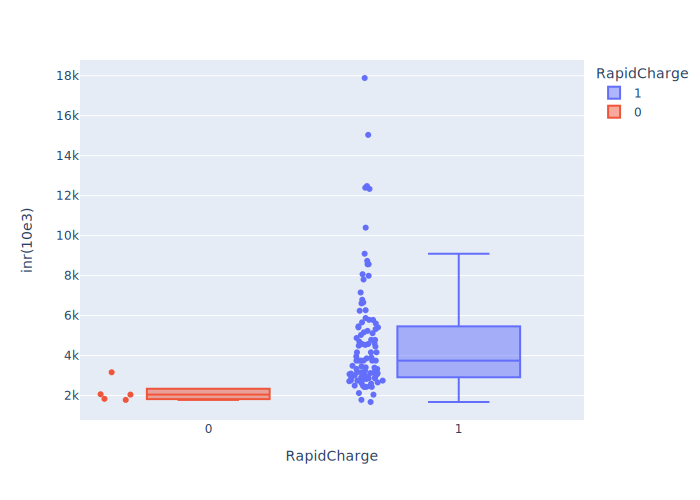

In [22]:
fig = px.box(df,x='RapidCharge',y = 'inr(10e3)',color = 'RapidCharge',points='all')
pio.show(fig)

# Type of Plug used for charging

In [23]:
df['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')

Text(0.5, 1.0, 'Plug Type')

# cars and their body style

In [24]:
df['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')

Text(0.5, 1.0, 'Body Style')

Most cars are eiher SUV or Hatchback

# Segment in which the cars fall under

In [25]:
df['Segment'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Segment')

Text(0.5, 1.0, 'Segment')

Most cars are either C or B type

# Seats in car

In [26]:
df['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')

Text(0.5, 1.0, 'Seats')

Putting independent variables as x and dependent variable as y

In [27]:
df5= df[["Range_Km", "TopSpeed_KmH"]].groupby("Range_Km").count()
df5.head(50)


,TopSpeed_KmH
Range_Km,
95,2
100,1
130,1
160,1
170,2
180,1
185,1
190,2
195,3


In [28]:
df3= df[["TopSpeed_KmH", "inr(10e3)"]].groupby("TopSpeed_KmH").count()
df3.head(10)


,inr(10e3)
TopSpeed_KmH,
123,1
130,7
135,3
140,4
144,1
145,2
150,15
155,2
157,2


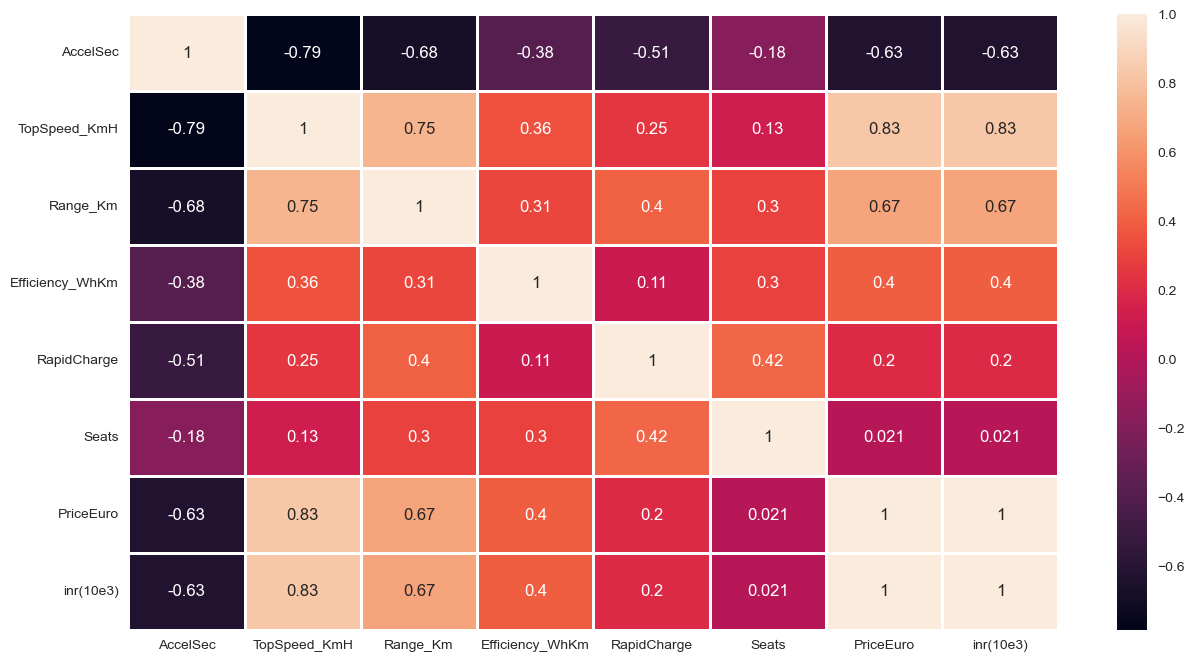

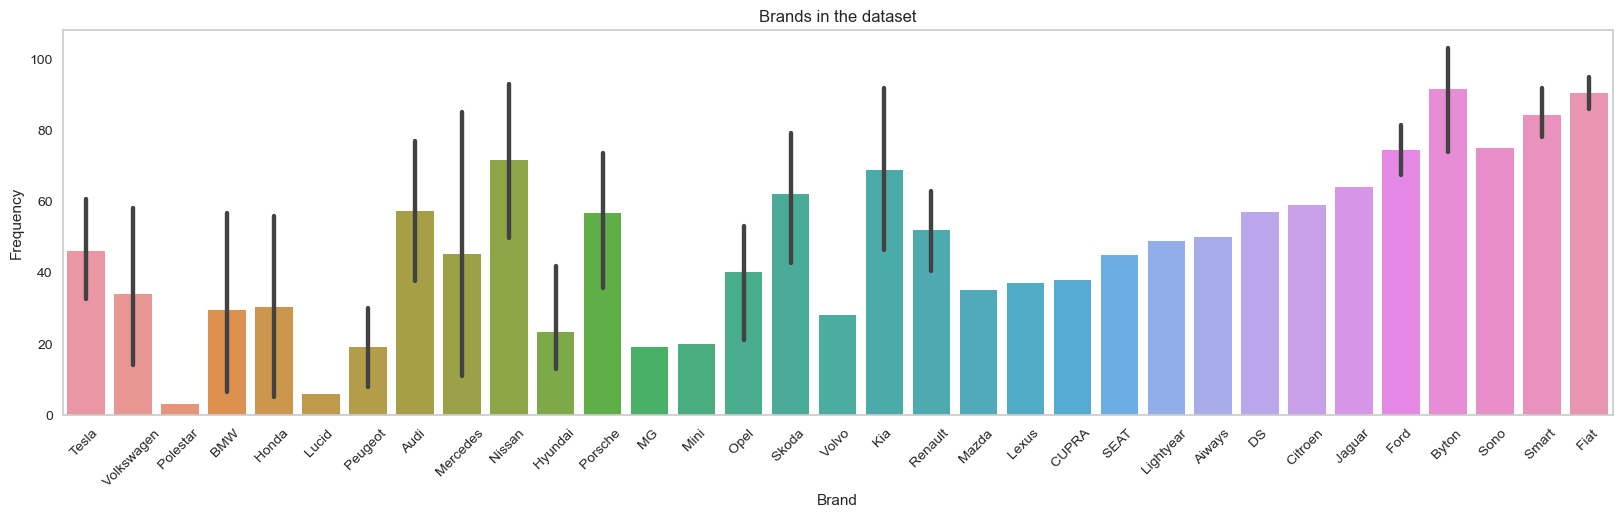

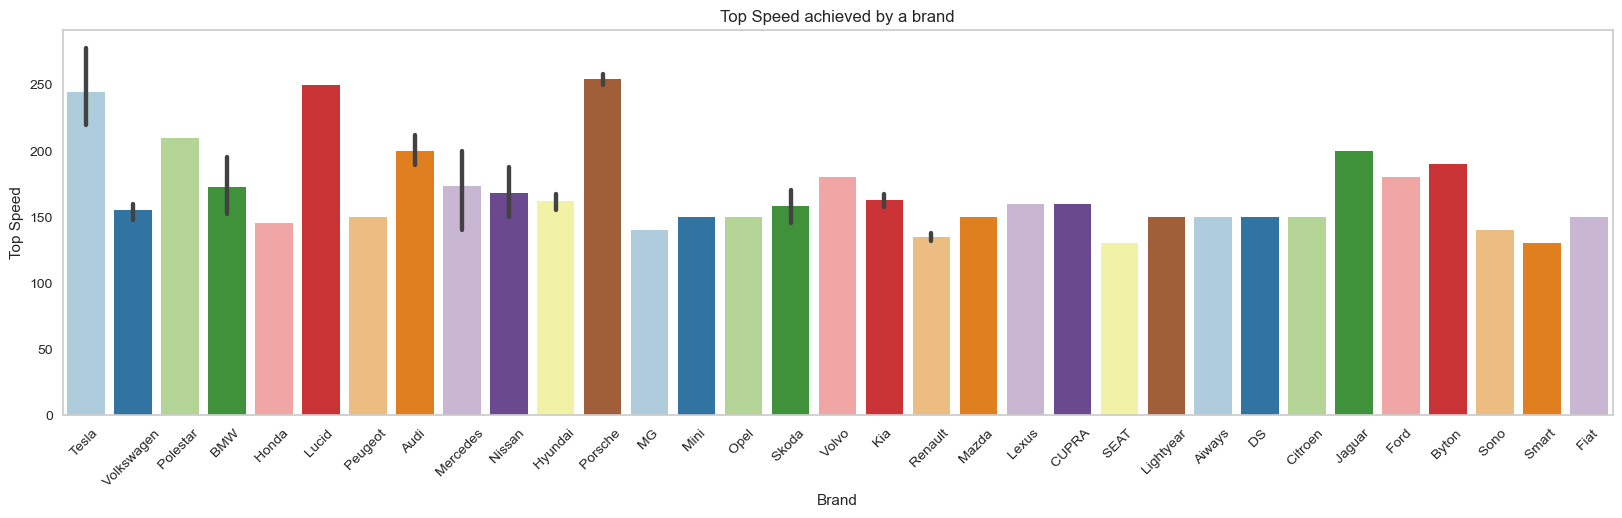

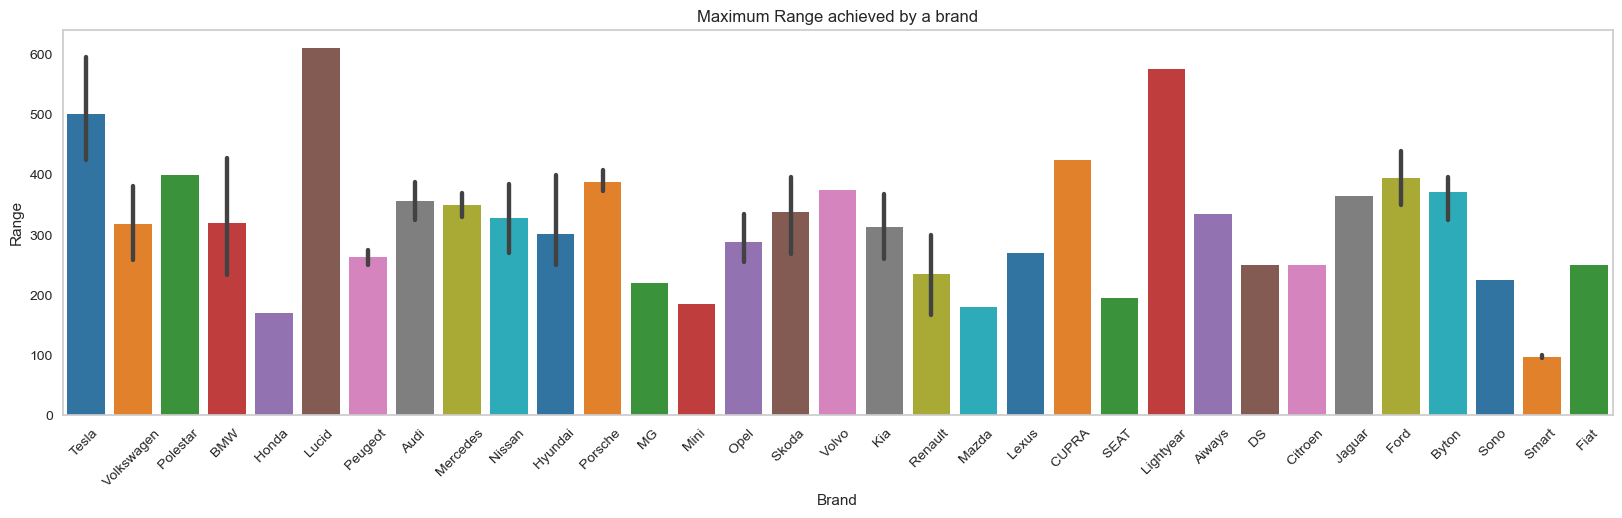

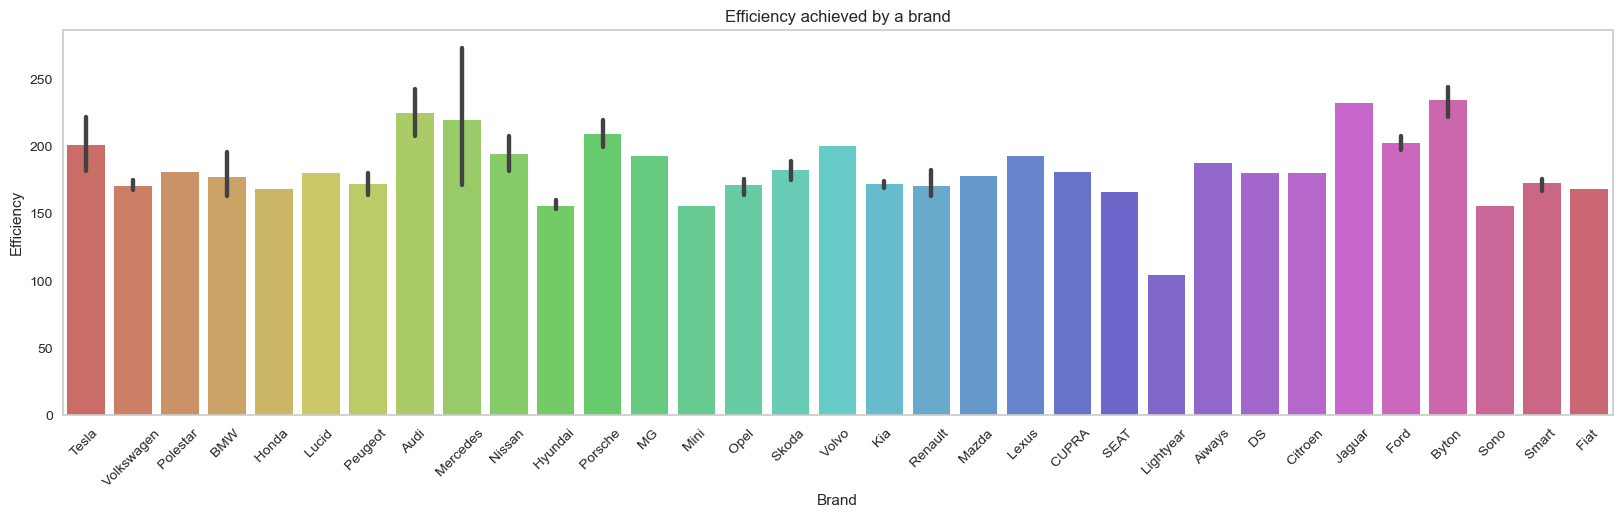

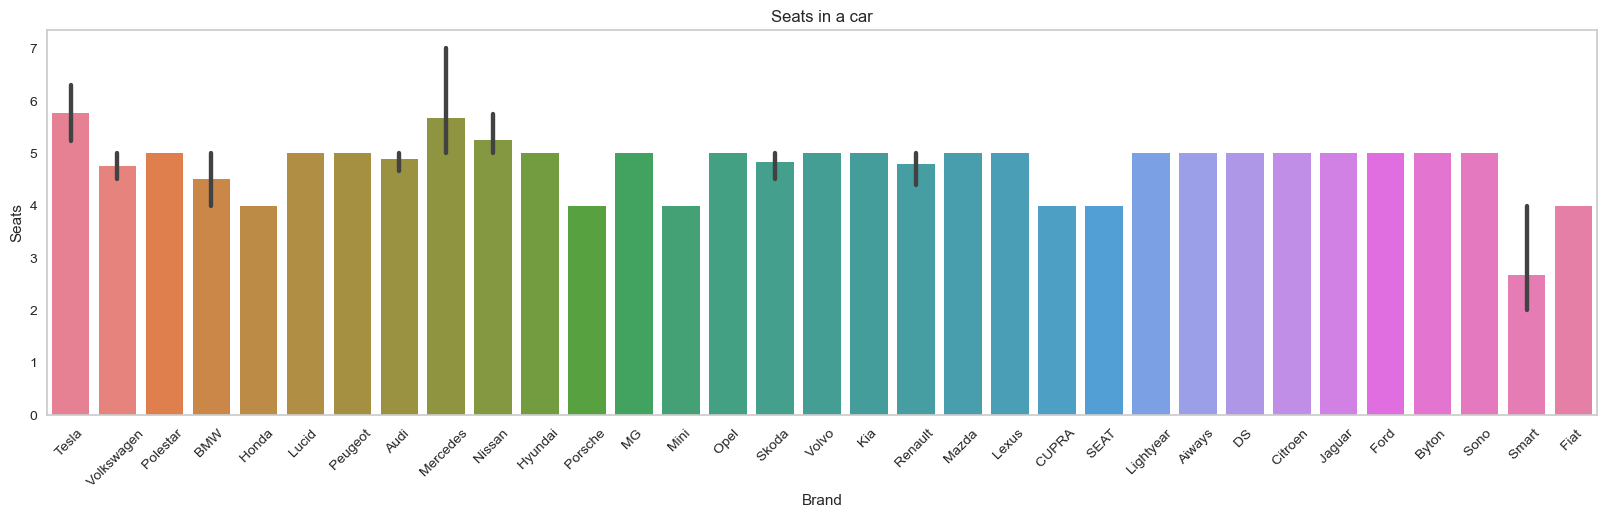

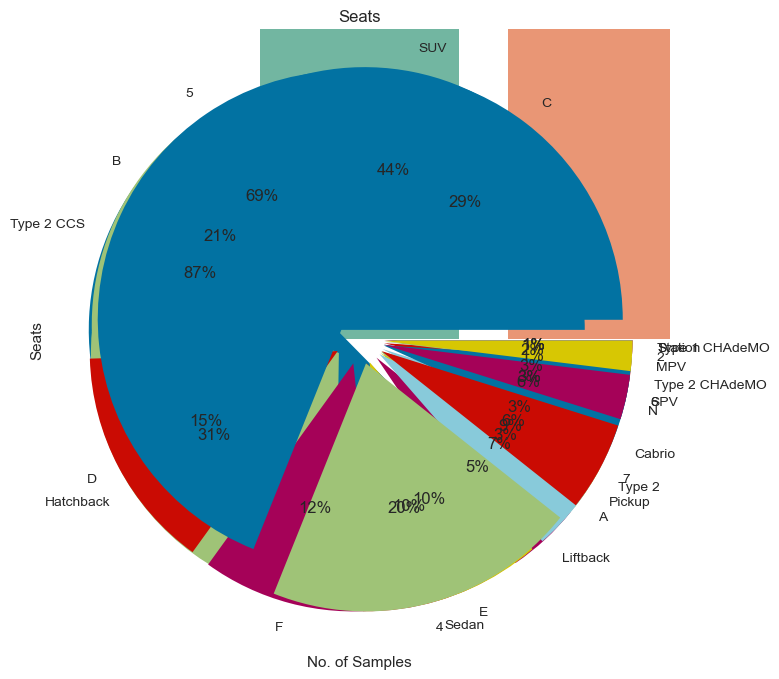

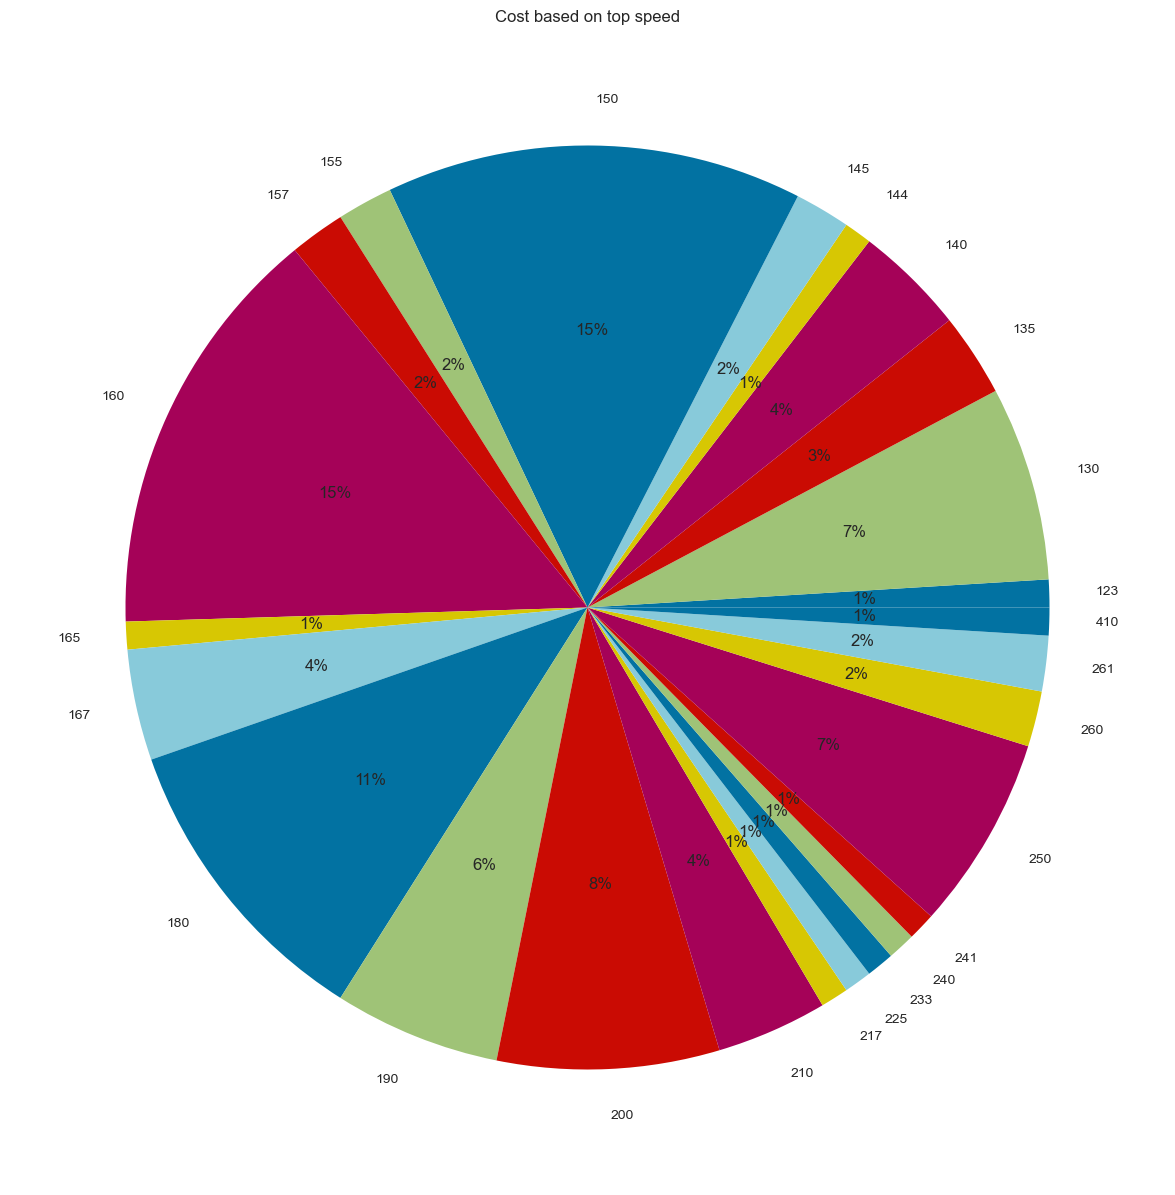

In [29]:
plt.figure(figsize=(20,15))
plt.title('Cost based on top speed')
plt.pie(x=df3["inr(10e3)"],labels=df3.index,autopct='%1.0f%%')
plt.show()

In [30]:
df4= df[["Range_Km", "inr(10e3)"]].groupby("Range_Km").count()
df4.head()



,inr(10e3)
Range_Km,
95,2
100,1
130,1
160,1
170,2


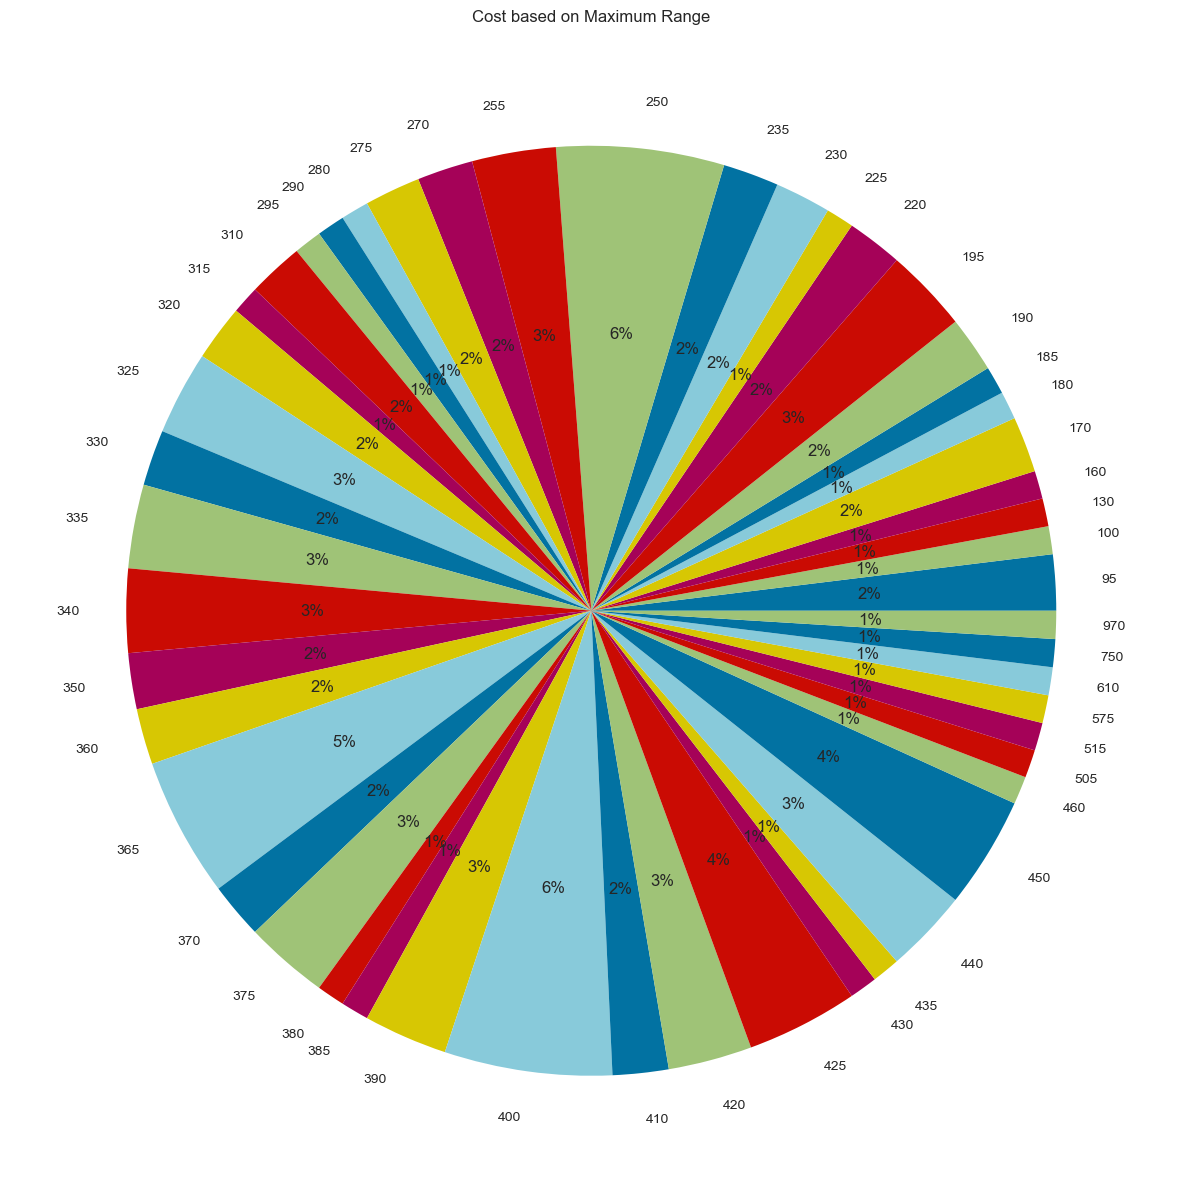

In [31]:
plt.figure(figsize=(15,20))
plt.title('Cost based on Maximum Range')
plt.pie(x=df4["inr(10e3)"],labels=df4.index,autopct='%1.0f%%')
plt.show()

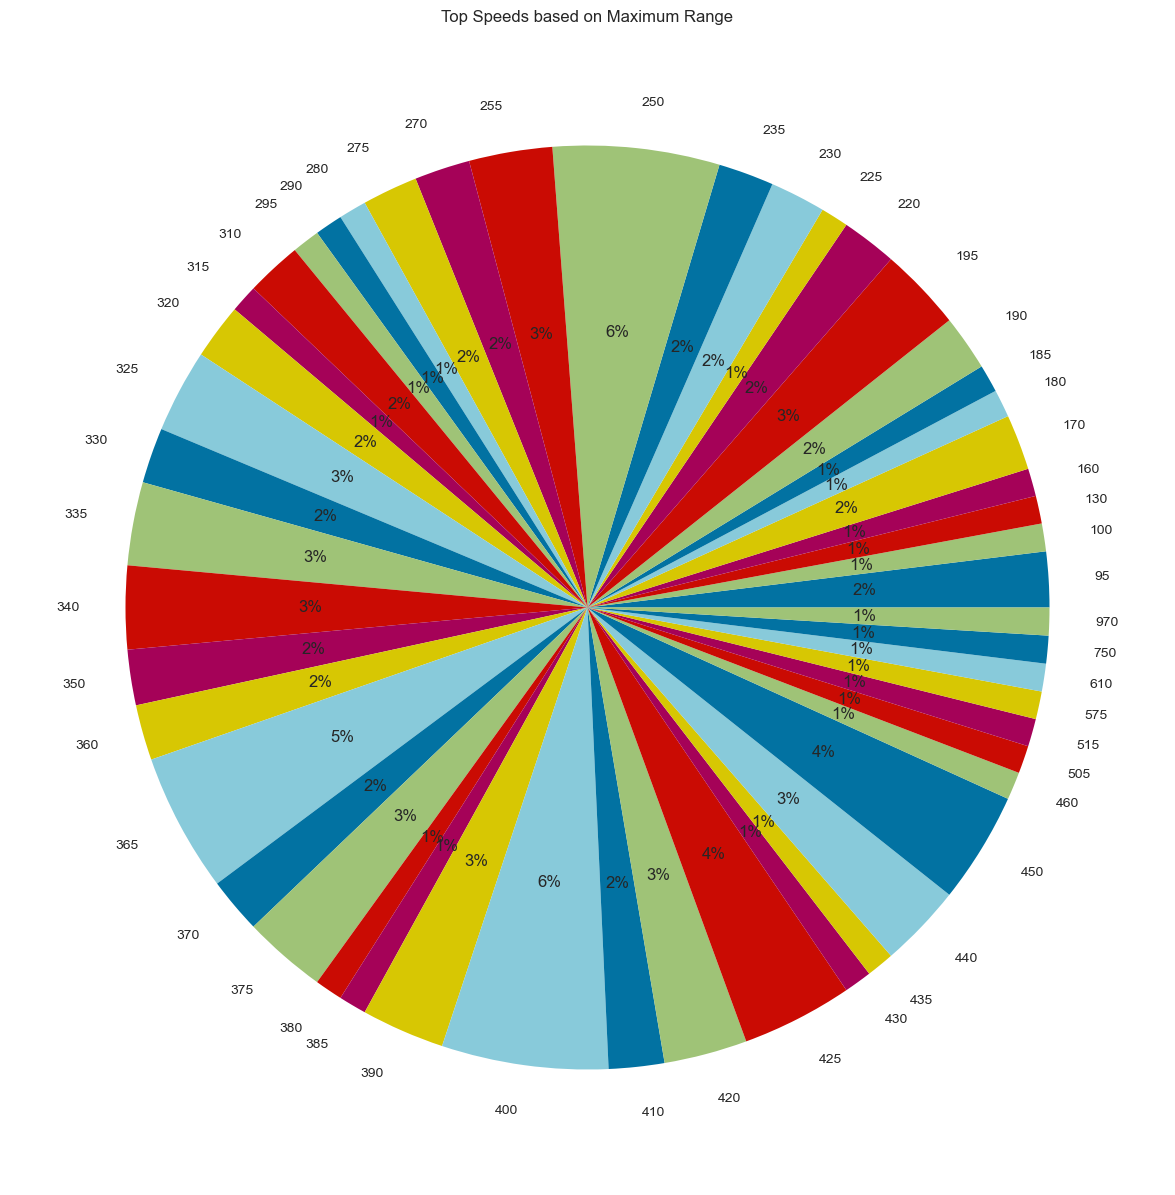

In [32]:
plt.figure(figsize=(20,15))
plt.title('Top Speeds based on Maximum Range')
plt.pie(x=df5["TopSpeed_KmH"],labels=df5.index,autopct='%1.0f%%')
plt.show()

# Regression
## Putting independent variable as x and dependent variables as y

In [33]:
df['PowerTrain'].replace(to_replace=['RWD','AWD','FWD'],value=[0, 2,1],inplace=True)
x=df[['AccelSec','Range_Km','TopSpeed_KmH','Efficiency_WhKm', 'RapidCharge','PowerTrain']]
y=df['PriceEuro']

In [34]:
x

,AccelSec,Range_Km,TopSpeed_KmH,Efficiency_WhKm,RapidCharge,PowerTrain
0,4.6000,450,233,161,1,2
1,10.0000,270,160,167,1,0
2,4.7000,400,210,181,1,2
3,6.8000,360,180,206,1,0
4,9.5000,170,145,168,1,0
...,...,...,...,...,...,...
98,7.5000,330,160,191,1,1
99,4.5000,335,210,258,1,2
100,5.9000,325,200,194,1,2
101,5.1000,375,200,232,1,2


In [35]:
y

0      55480
1      30000
2      56440
3      68040
4      32997
       ...  
98     45000
99     96050
100    50000
101    65000
102    62000
Name: PriceEuro, Length: 103, dtype: int64

## Finding linear regression using OLS method

In [36]:
x= sm.add_constant(x)
results = sm.OLS(y,x)

## Fit the model and summarizing

In [37]:
model=results.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceEuro   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     41.34
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           1.60e-24
Time:                        21:21:43   Log-Likelihood:                -1155.0
No. Observations:                 103   AIC:                             2324.
Df Residuals:                      96   BIC:                             2343.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -9.576e+04   3.04e+04     -3.148      0.002   -1.56e+05   -3.54e+04
AccelSec         1538.7358   1189.961      1.293      0.199    -823.317    3900.789
Range_Km           38.6413     23.362      1.654      0.101      -7.732      85.015
TopSpeed_KmH      570.8864     86.671      6.587      0.000     398.845     742.927
Efficiency_WhKm   112.0050     70.227      1.595      0.114     -27.395     251.405
RapidCharge     -2827.5602   1.09e+04     -0.259      0.796   -2.45e+04    1.88e+04
PowerTrain       5458.2534   2954.494      1.847      0.068    -406.371    1.13e+04
==============================================================================
Omnibus:                       84.153   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              723.603
Skew:                           2.620   Prob(JB):                    7.44e-158
Kurtosis:                      14.881   Cond. No.                     7.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Importing train split from scikit learn


In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=52)

In [39]:
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

# Finding out R squared value

In [40]:
from sklearn.metrics import r2_score
r2=(r2_score(y_test,pred))
print(r2*100)

82.75847513858464


Around 82% of the dependant variable has been explained by the independant variables

In [41]:
y1=df[['RapidCharge']]
x1=df[['PriceEuro']]

In [42]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=365)

In [43]:
log= LogisticRegression()
log.fit(X1_train, y1_train)
pred1 = log.predict(X1_test)
pred1

C:\Users\rchan\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

## Clustering

In [44]:
ax=plt.subplots(figsize=(15,8))
sb.stripplot(x='TopSpeed_KmH', y='FastCharge_KmH', data=df, jitter=True)

<AxesSubplot:xlabel='TopSpeed_KmH', ylabel='FastCharge_KmH'>

In [45]:
ax=plt.subplots(figsize=(15,8))
sb.stripplot(x='TopSpeed_KmH', y='AccelSec', data=df, jitter=True)

<AxesSubplot:xlabel='TopSpeed_KmH', ylabel='AccelSec'>

In [46]:
ax=plt.subplots(figsize=(15,8))
sb.stripplot(x='TopSpeed_KmH', y='Efficiency_WhKm', data=df, jitter=True)

<AxesSubplot:xlabel='TopSpeed_KmH', ylabel='Efficiency_WhKm'>

In [47]:
features = ['AccelSec','TopSpeed_KmH','Efficiency_WhKm', 'RapidCharge','Range_Km', 'Seats', 'inr(10e3)','PowerTrain']
# Separating out the features
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)


In [48]:
pca = PCA(n_components=8)
t = pca.fit_transform(x)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7', 'PC8'])
data2

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8
0,1.5113,0.2120,-1.0143,-0.9438,0.4121,-0.8232,0.3279,-0.3689
1,-1.7406,-0.5828,-0.6710,0.6083,0.3941,0.1555,-0.3973,-0.3224
2,1.2930,0.0209,-0.3737,-0.7301,-0.0892,-0.6444,0.2832,-0.0881
3,0.0213,-0.1154,-0.0850,1.5579,0.1865,0.2337,-0.4378,0.1833
4,-2.3280,0.2449,-0.7962,0.5904,-0.7448,0.2406,-0.5019,-0.1635
...,...,...,...,...,...,...,...,...
98,-0.3383,-0.4627,-0.0185,0.1724,-0.1474,0.0289,0.1420,0.1329
99,2.2795,0.2302,1.6805,0.3698,-1.0874,0.1321,-0.3490,0.1014
100,0.8151,-0.1643,0.1789,-0.7220,-0.4616,-0.4929,0.0801,-0.2633
101,1.6176,-0.0897,1.0125,0.0003,-0.7315,-0.2048,0.2896,-0.0988


In [49]:
df_8=data2.iloc[:,:8]
df_8.head(3)

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8
0,1.5113,0.2120,-1.0143,-0.9438,0.4121,-0.8232,0.3279,-0.3689
1,-1.7406,-0.5828,-0.6710,0.6083,0.3941,0.1555,-0.3973,-0.3224
2,1.2930,0.0209,-0.3737,-0.7301,-0.0892,-0.6444,0.2832,-0.0881


In [50]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_8.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
variable,,,,,,,,
PC1,-0.4261,-0.0332,0.2239,-0.1880,0.3019,0.6450,0.0035,-0.4741
PC2,0.4372,0.2682,-0.0924,0.0305,0.1930,-0.2701,-0.3266,-0.7145
PC3,0.2666,-0.0751,0.7460,0.4668,-0.3301,0.1125,0.1099,-0.1235
PC4,0.2493,-0.5371,-0.4792,0.0780,-0.4624,0.3823,-0.0758,-0.2186
Pc5,0.4135,0.0166,-0.1924,0.2019,0.4708,0.1947,0.7005,0.0262
PC6,0.1760,-0.7124,0.2375,-0.0861,0.5109,-0.1609,-0.3009,0.1422
PC7,0.4072,0.3534,0.0147,-0.0254,0.1113,0.5369,-0.4773,0.4241
PC8,0.3553,-0.0082,0.2481,-0.8312,-0.2319,-0.0092,0.2577,-0.0302


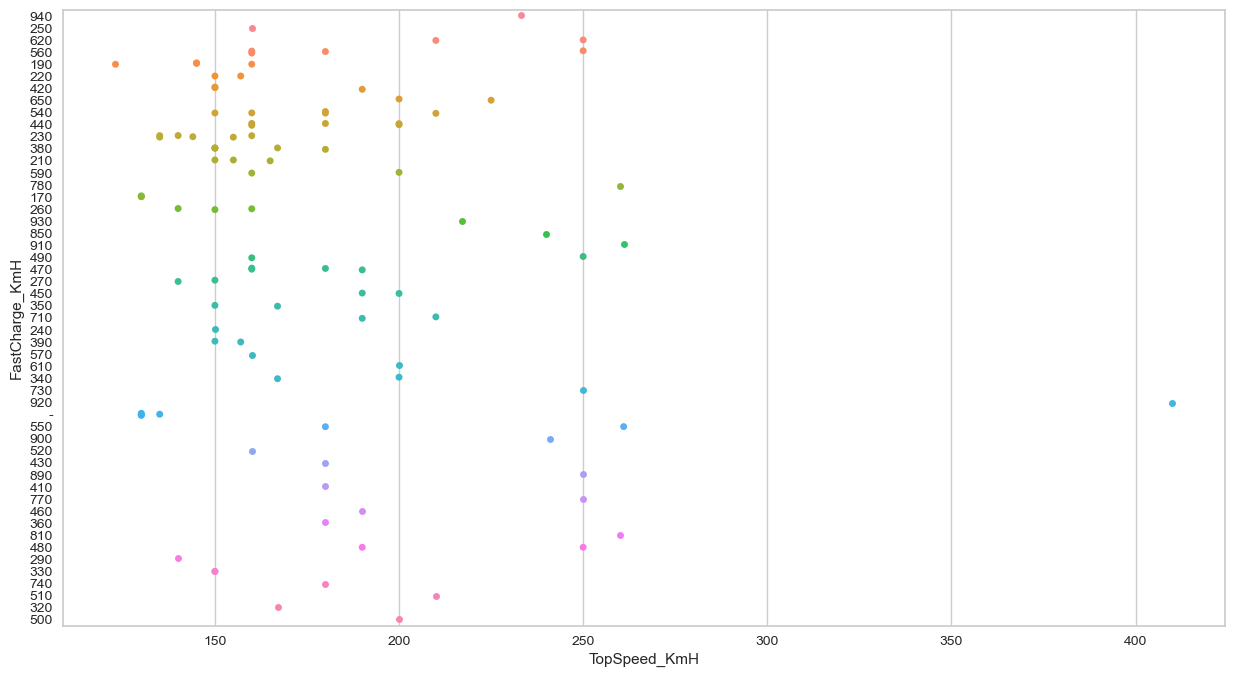

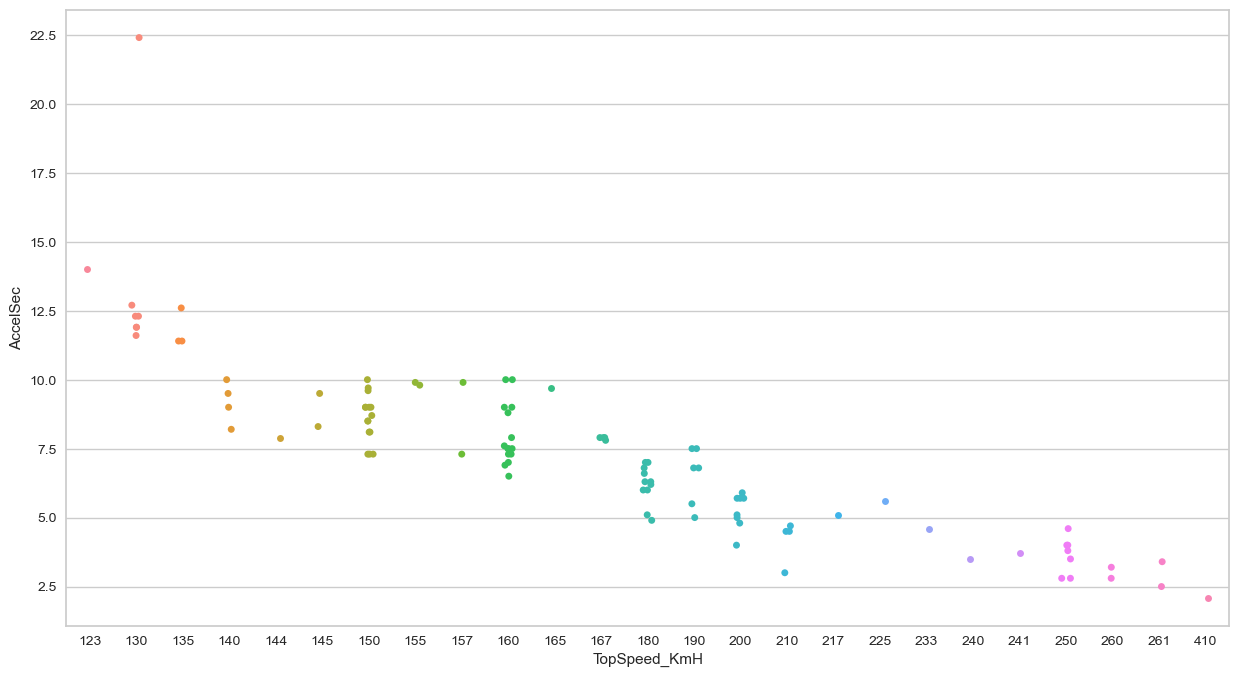

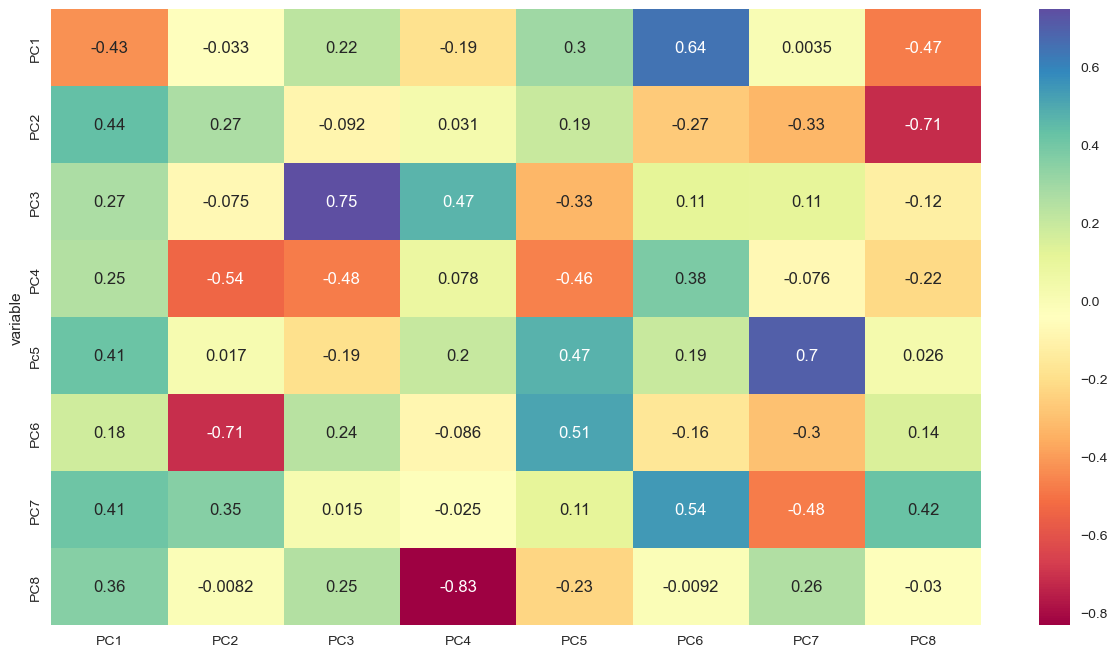

In [51]:
#Correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sb.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

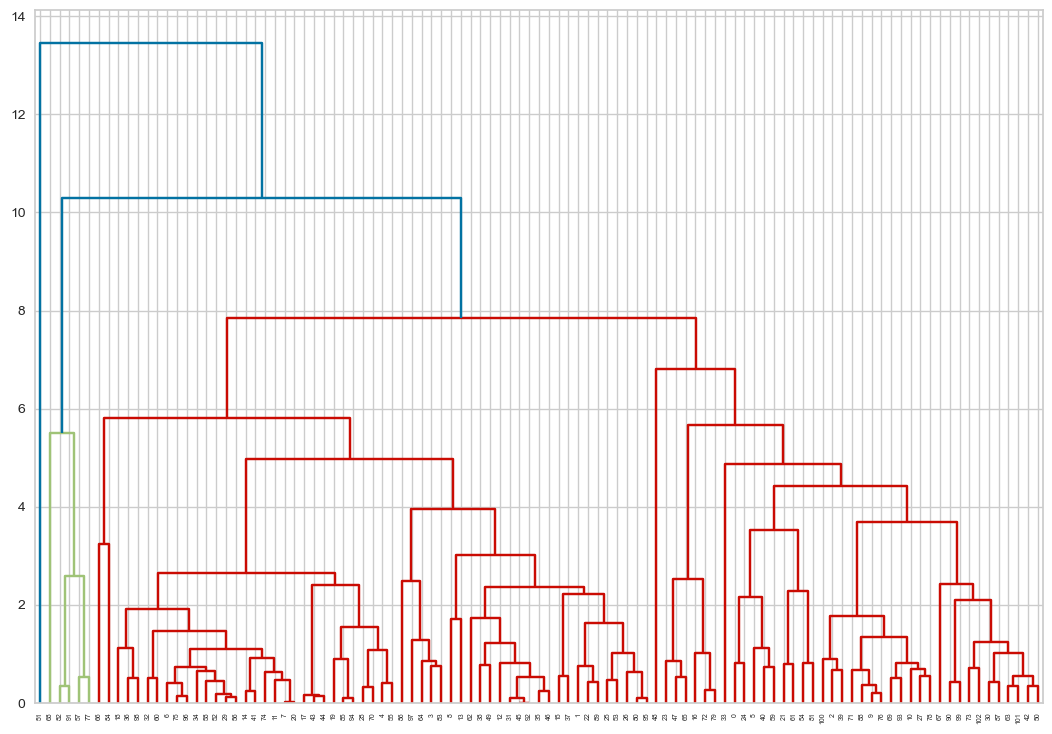

In [52]:
linked = linkage(data2, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()

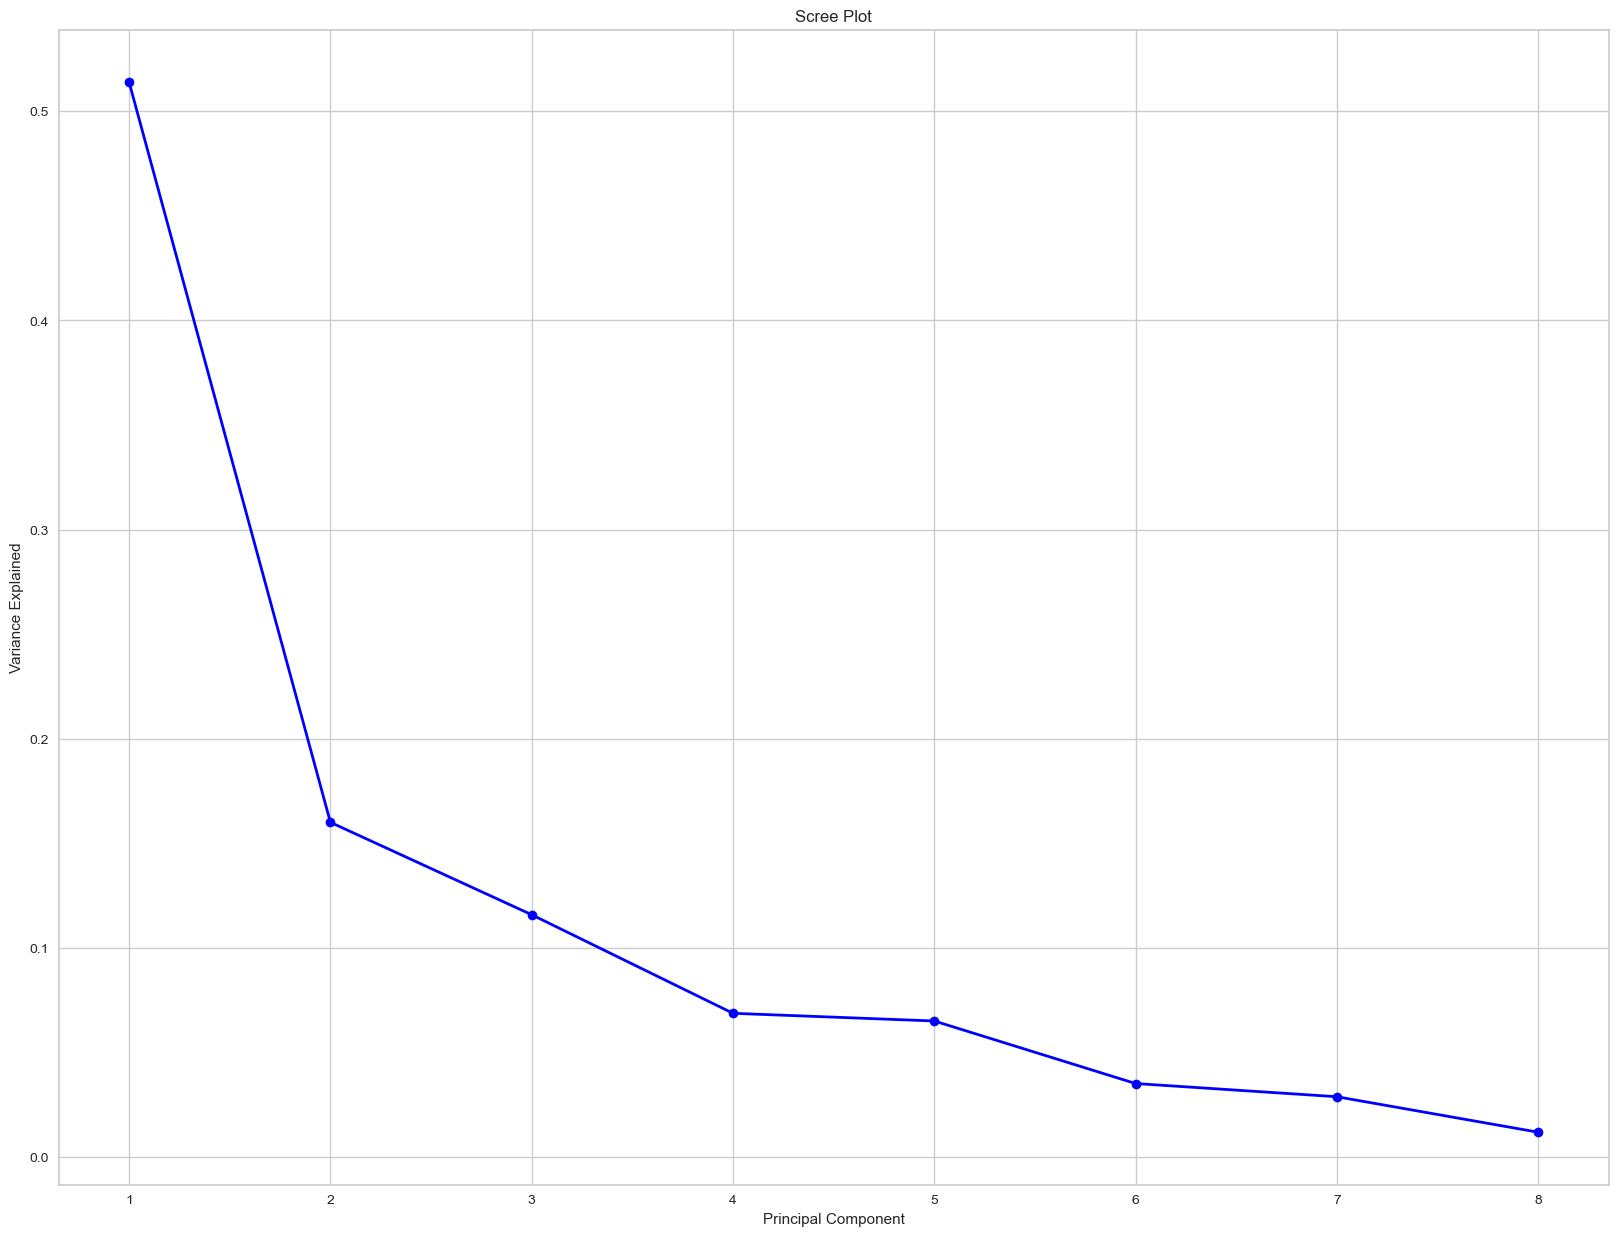

In [53]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

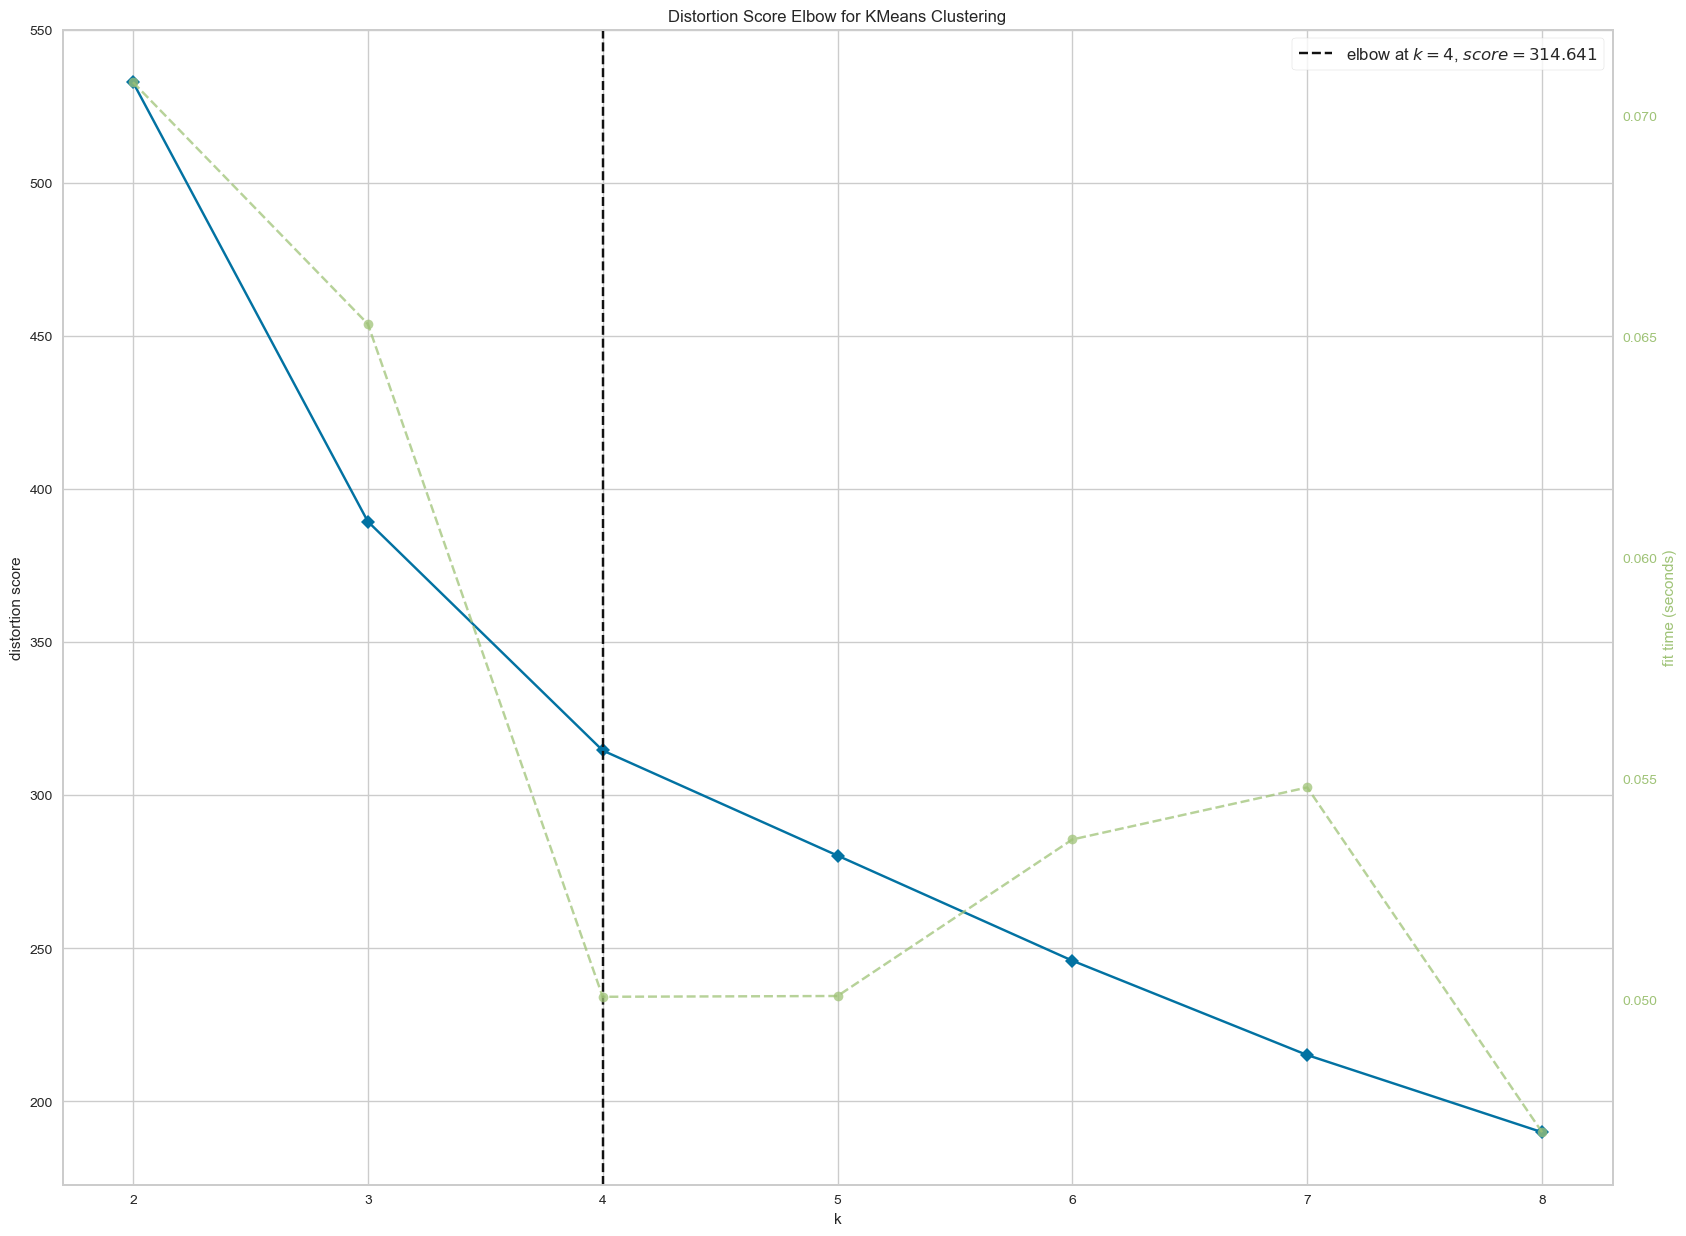

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='distortion', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

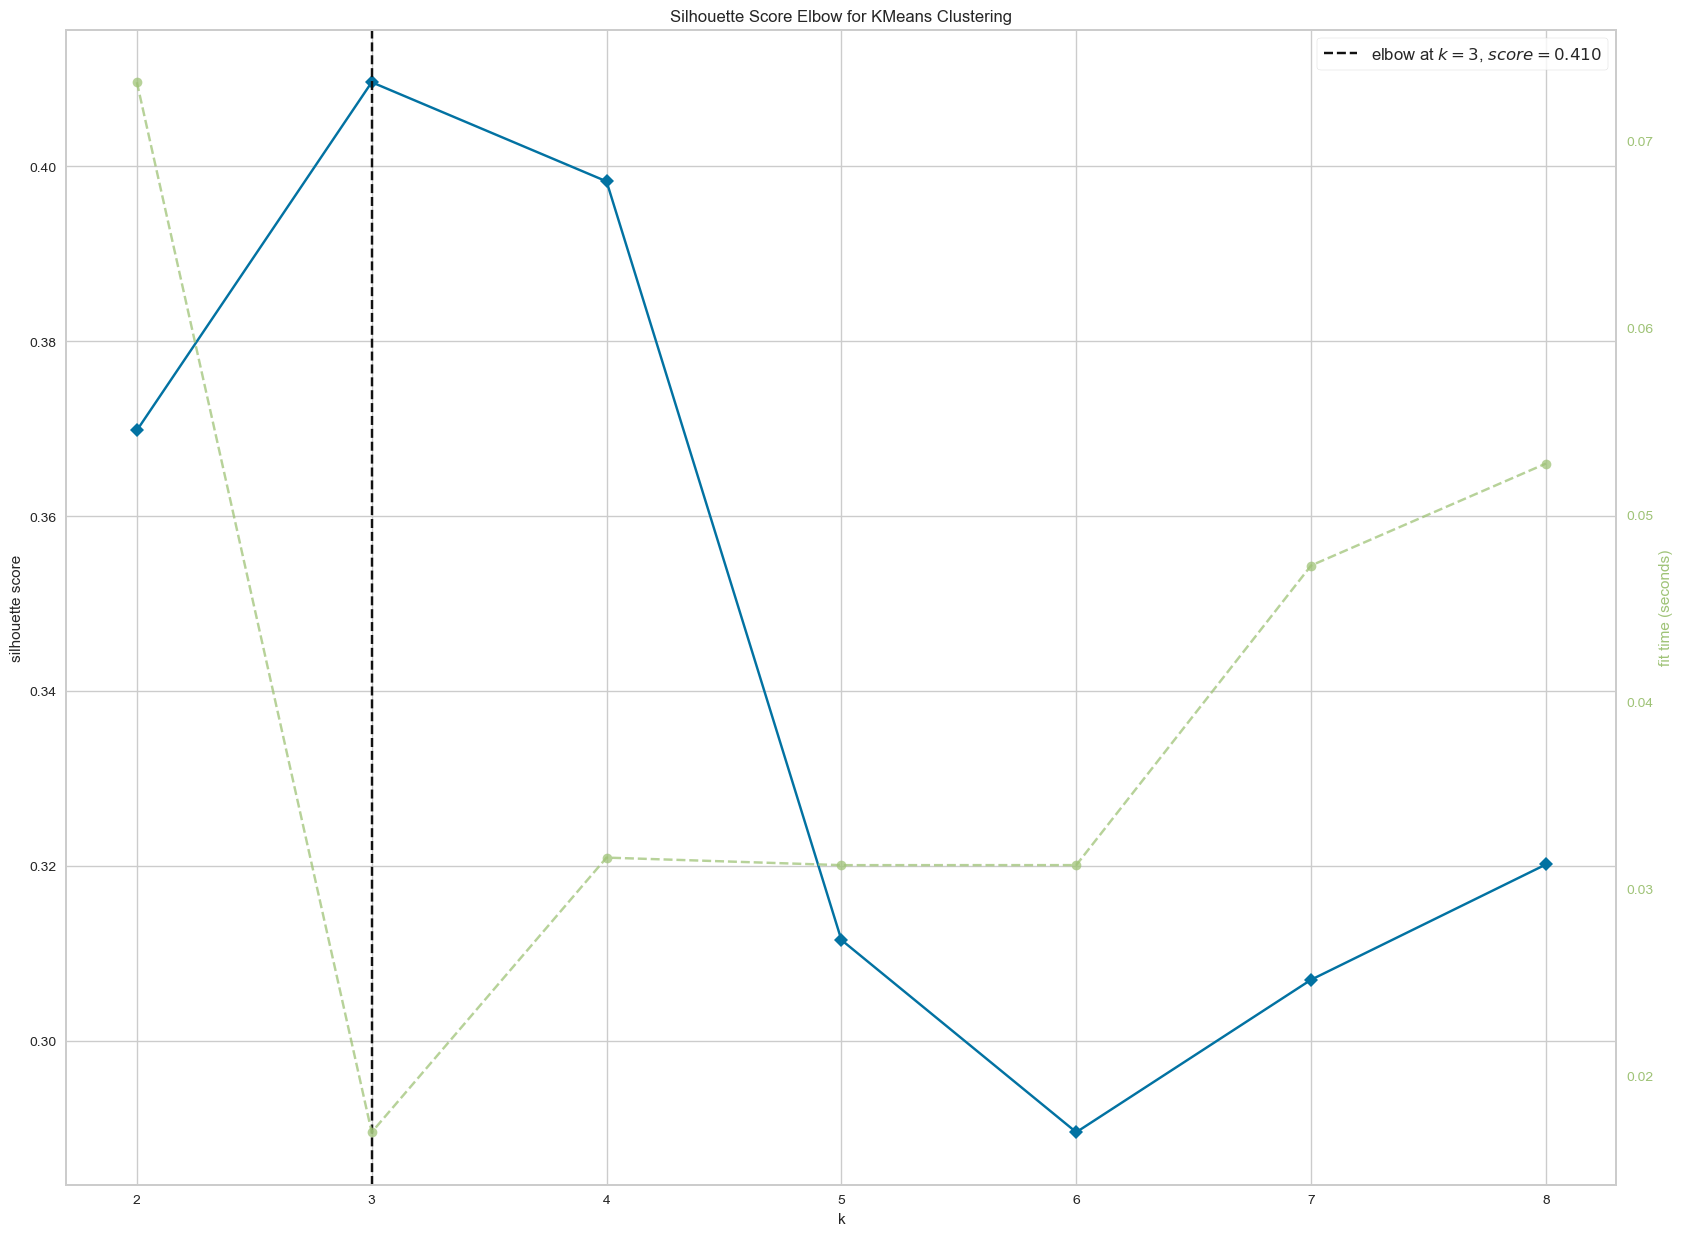

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [55]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='silhouette', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


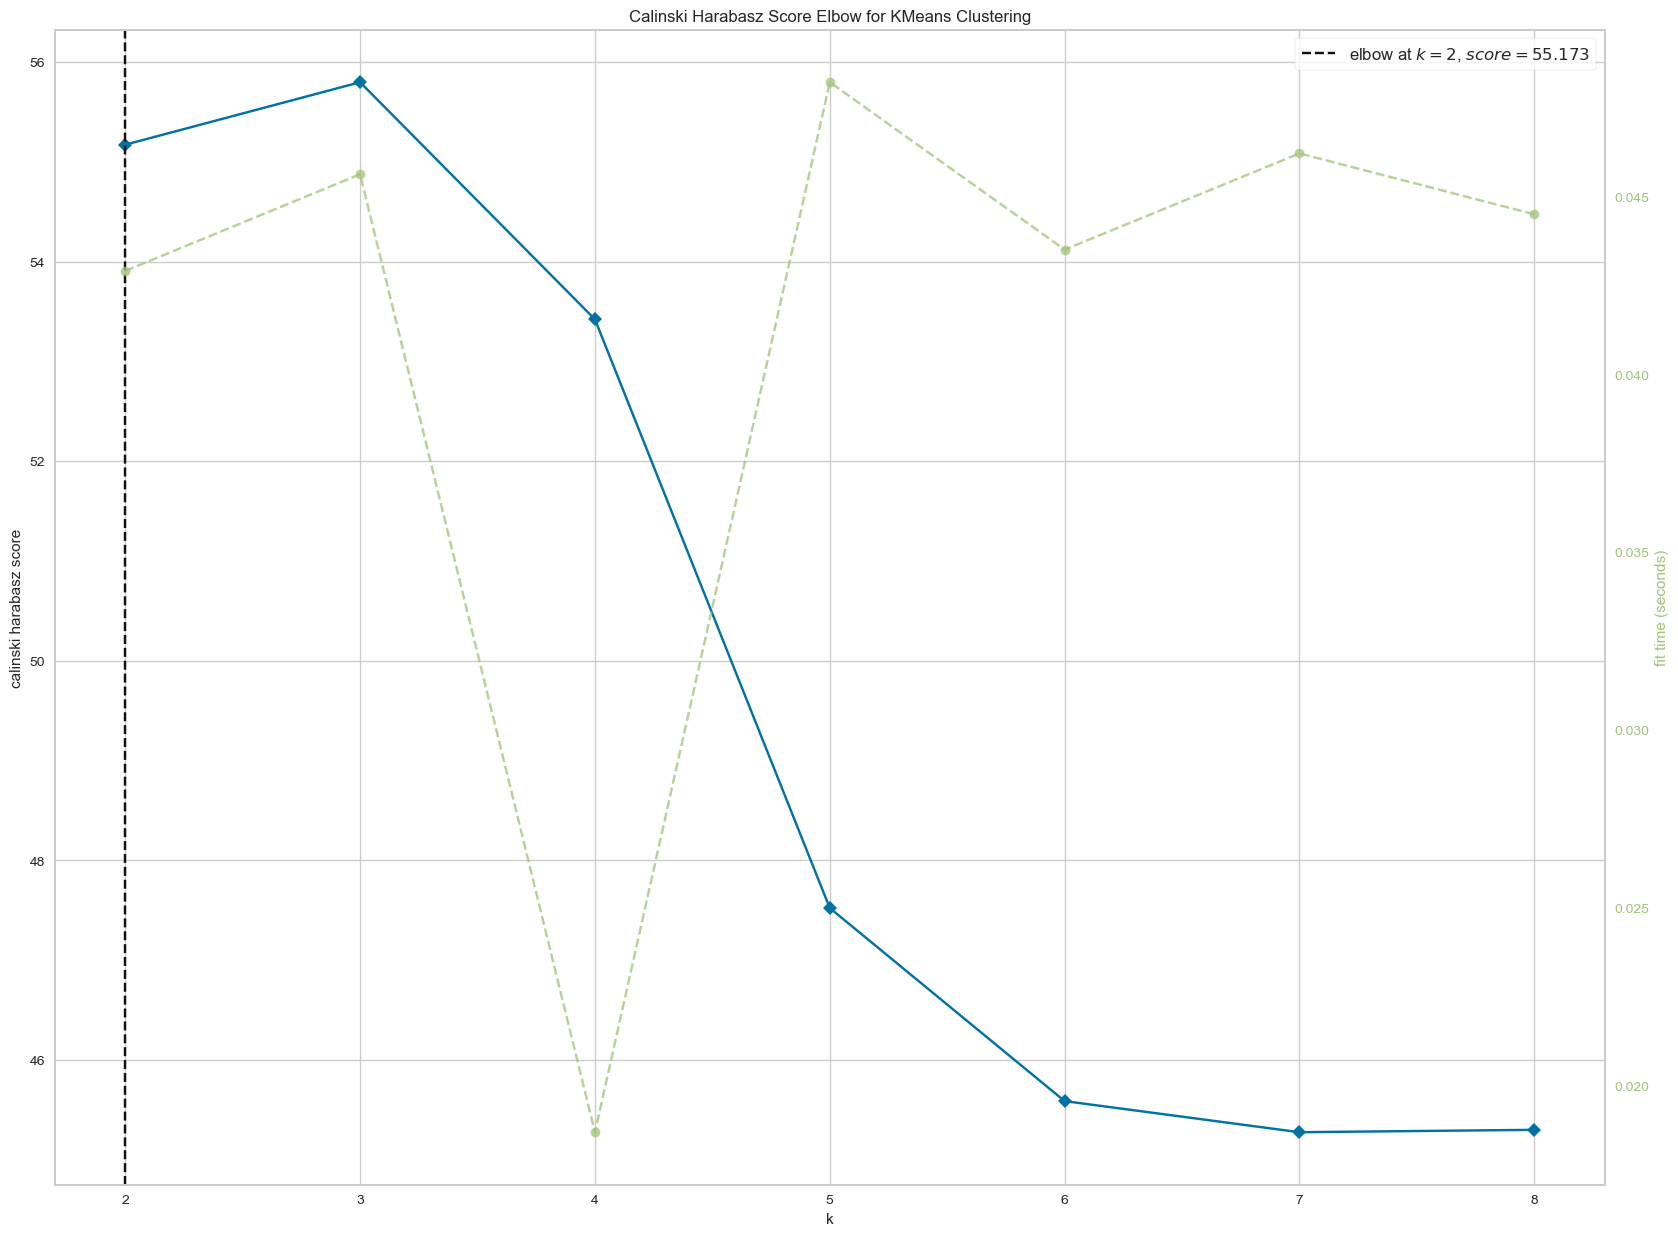

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [56]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='calinski_harabasz', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show() 

In [57]:
#K-means clustering 

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[2 3 2 3 3 1 3 3 3 2 2 3 3 3 3 3 1 3 3 3 3 2 3 1 1 3 3 2 3 3 2 3 3 2 3 3 3
 3 3 2 1 3 2 3 3 3 3 1 1 3 2 1 3 3 2 3 3 0 3 1 3 2 3 2 3 1 3 2 0 2 3 2 1 2
 3 3 2 0 2 1 3 2 0 3 2 3 2 2 2 3 2 0 3 2 3 3 3 3 3 2 2 2 2]
314.6407273029632
9
[[-4.53778  3.04569  1.96775 -0.19021  1.06688 -0.47723  0.07771  0.09266]
 [ 3.01658  1.57593 -0.62345 -0.33835  0.16047  0.2831  -0.26808  0.02962]
 [ 1.51438 -0.44143  0.74095 -0.17617 -0.15842 -0.19705  0.16547  0.02446]
 [-1.0992  -0.37192 -0.46048  0.19041 -0.04271  0.09268 -0.04184 -0.02867]]


In [58]:
#To see each cluster size

Counter(kmeans.labels_)

Counter({2: 31, 3: 55, 1: 12, 0: 5})

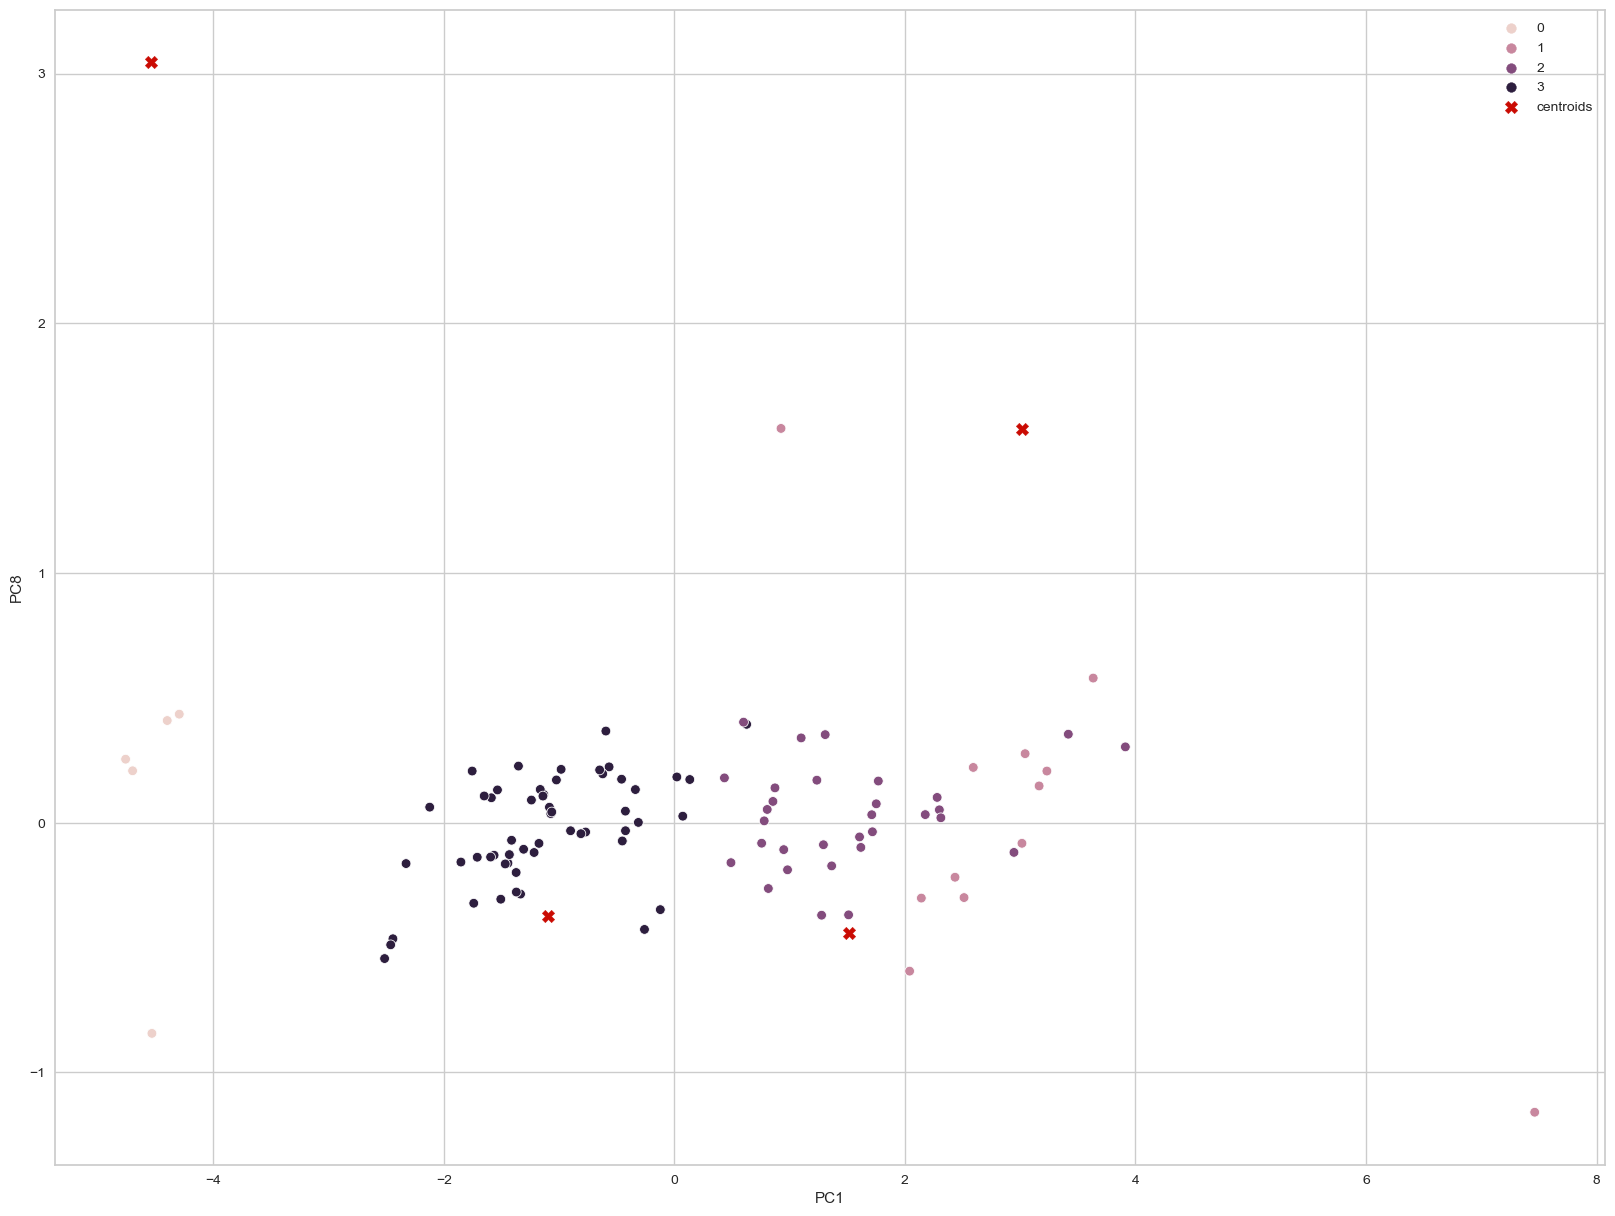

In [59]:
#Visulazing clusters
sb.scatterplot(data=data2, x="PC1", y="PC8", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

### Regression Part 2

In [60]:
X=data2[['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7','PC8']]
y=df['inr(10e3)']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=101)
lm=LinearRegression().fit(X_train,y_train)

In [62]:
print(lm.intercept_)

4643.522050485437


In [63]:
lm.coef_

array([ 1150.93062,   998.79191,    41.681  ,   -71.7465 ,   314.46764,
        1517.51552, -1349.01035,  1198.59623])

In [64]:
X_train.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'Pc5', 'PC6', 'PC7', 'PC8'], dtype='object')

In [65]:
cdf=pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
PC1,1150.9306
PC2,998.7919
PC3,41.6810
PC4,-71.7465
Pc5,314.4676
PC6,1517.5155
PC7,-1349.0104
PC8,1198.5962


In [66]:
predictions=lm.predict(X_test)
predictions

array([ 3744.    ,  2496.    ,  5233.28  ,  3243.7184,  3064.8384,
        5459.584 ,  2903.68  ,  3328.    ,  3952.    ,  2594.5088,
        2654.08  ,  3744.    ,  2041.2288, 15040.9792,  6609.824 ,
        3170.336 ,  4451.2   ,  2866.9888,  3744.    , 17888.    ,
        4877.184 ,  5660.928 ,  5876.4992,  2062.528 , 12396.8   ,
        8565.024 , 12338.6432,  3328.    ,  4695.808 ,  5408.    ,
        3064.8384,  3120.    ,  2826.3872, 10400.    ,  2745.6   ,
        2912.    ,  3153.28  ,  5028.3584,  2424.9472,  2766.0672,
        5604.1856,  3098.1184])

In [67]:
y_test

37    3744.0000
1     2496.0000
69    5233.2800
80    3243.7184
92    3064.8384
61    5459.5840
85    2903.6800
53    3328.0000
88    3952.0000
32    2594.5088
6     2654.0800
71    3744.0000
43    2041.2288
16   15040.9792
50    6609.8240
31    3170.3360
97    4451.2000
14    2866.9888
25    3744.0000
51   17888.0000
21    4877.1840
3     5660.9280
84    5876.4992
57    2062.5280
48   12396.8000
47    8565.0240
79   12338.6432
58    3328.0000
2     4695.8080
13    5408.0000
45    3064.8384
89    3120.0000
41    2826.3872
23   10400.0000
26    2745.6000
22    2912.0000
94    3153.2800
27    5028.3584
20    2424.9472
66    2766.0672
30    5604.1856
35    3098.1184
Name: inr(10e3), dtype: float64

In [68]:
plt.scatter(y_test, predictions)

### Validate the model

In [69]:
#Residual histogram plot
sb.distplot((y_test-predictions))

C:\Users\rchan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='inr(10e3)', ylabel='Density'>

In [70]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 2.6635201980492897e-12
MSE: 1.3057636812444223e-23
RMSE: 3.6135352236340833e-12


In [71]:
metrics.mean_absolute_error(y_test,predictions)

2.6635201980492897e-12

In [72]:
metrics.mean_squared_error(y_test,predictions)

1.3057636812444223e-23

In [73]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

3.6135352236340833e-12